### Python EDA and Data Visualization Project - Airbnb Listing 2024 (NYC) ###

**Step 1: Importing all dependencies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

**Step 2: Loading datasets**

In [4]:
data = pd.read_csv(r'C:\Users\hp\Downloads\Airbnb_dataset.csv', encoding_errors='ignore') # r--raw file,used for avoiding back slashes, mainly used while reading a file because back slashes can often be mistaken as escape characters. encoding_errors--if you run into any encoding issues (like weird or unreadable characters) while reading this CSV file, just ignore those characters instead of throwing an error. 

**Step 3: Initial Exploration**

In [22]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,1/5/2023,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,3/12/2023,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [24]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,1/7/2023,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,8/12/2023,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10/12/2023,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


In [28]:
data.shape

(20770, 22)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [32]:
data.describe() #statistical summary--this is done through only the numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


**As we can see in the above result set that the count of Price = 20636 whereas the total no. of entries were 20770(as seen in the shape of dataset) because obviously each entry should have some price value. That means few price entries are missing.**

**Step 4: Data Cleaning**

**Data inconsistencies can take many forms—like missing values, incorrect data types, duplicates, outliers, or invalid categories.**

In [5]:
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

**All these are missing values under each column, to get rid of them either we can replace them with avg/mean/mode or we can entirely drop that row. In this case we will be dropping the rows.**

In [7]:
# dropping all the missing value rows
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

**In case you want to fill it up with some value then use the fillna() method.
Now we can again check the shape of the dataset and we'll get the no. of rows after dropping the rows with missing values.**

In [11]:
data.shape

(20736, 22)

**Now, we'll find the no. of duplicate records/rows present**

In [11]:
data.duplicated().sum()  

12

**To find the duplicate values within the dataset we need to give a filter for that**

In [13]:
data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,1/5/2023,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,3/12/2023,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5,1,1,1
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,No rating,2,2,2
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2,2,1
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,2/1/2024,2.60,1.0,356.0,9.0,Exempt,4.33,1,2,1
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,8/9/2023,1.08,3.0,274.0,3.0,No License,4.89,2,2,1
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,No rating,Studio,1,1


**Now we will drop these duplicate values using the drop_duplicates() mehtod.**

In [15]:
data.drop_duplicates(inplace = True)  #we use inplace=True so that the function is performed on the original dataset i.e. 'data'.

In [17]:
data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths


In [19]:
data.duplicated().sum()

0

**Now we will check for any data inconsistencies like different data types**

In [5]:
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [9]:
#type casting
#changing data types
#changing data type of 'id' column from float to object because its not an imp column nor are we performing any statistical calculation on it
data['id'] = data['id'].astype(object)

In [11]:
data.dtypes

id                                 object
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

**Similarly, for 'host_id' column we will chnage the data type to object**

In [13]:
data['host_id'] = data['host_id'].astype(object)

In [15]:
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

**Step 5: Data Analysis**

# Univariate Analysis - It tells us how one column will be affecting other columns.

**We will be performng the univariate analysis w.r.t. 'Price' column.**

In [17]:
data['price']

0         55.0
1        144.0
2        187.0
3        120.0
4         85.0
         ...  
20765     45.0
20766    105.0
20767    299.0
20768    115.0
20769    102.0
Name: price, Length: 20770, dtype: float64

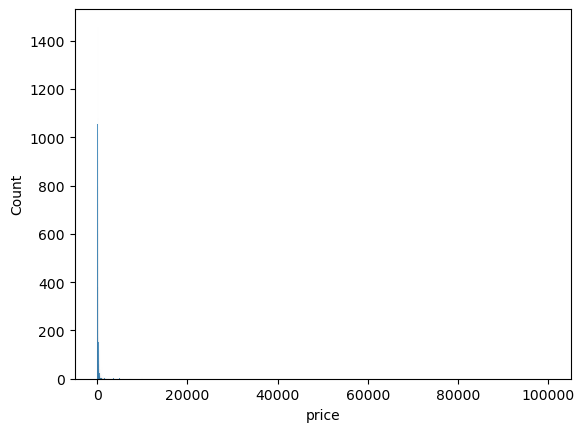

In [5]:
#Price Distribution
sb.histplot(data=data, x='price')
plt.show()

**To check for the outliers we need to use the boxplot as it would give a better and closer picture of the price column.**

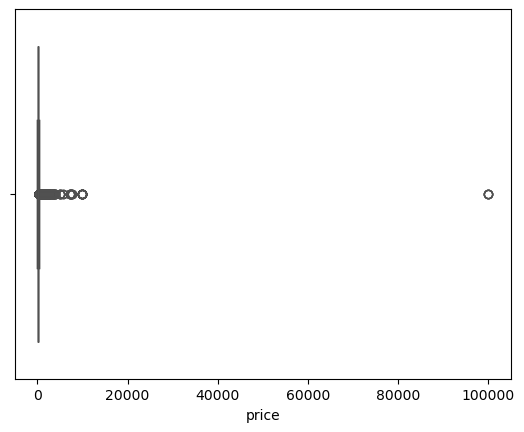

In [9]:
#identifying outliers in price
sb.boxplot(data=data, x='price')
plt.show()

**Here we can see most of the prices range from $0 to <$20,000 and just few are located neer the $1000,000 mark.** **So for better analysis we need to drop or remove those reords which are around $100,000.**

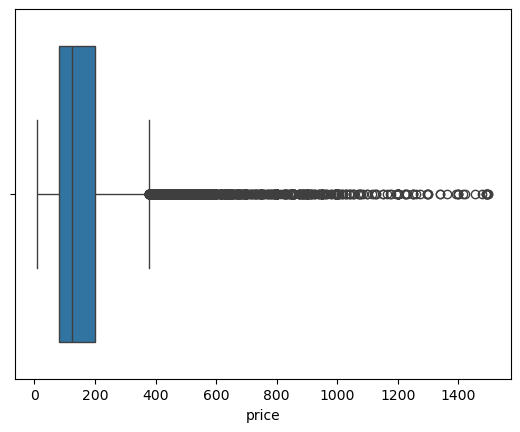

In [7]:
df = data[data['price'] < 1500]
sb.boxplot(data = df, x='price')
plt.show()

**Here we see that the prices are spread evenly across the range of 0 to <1500.**

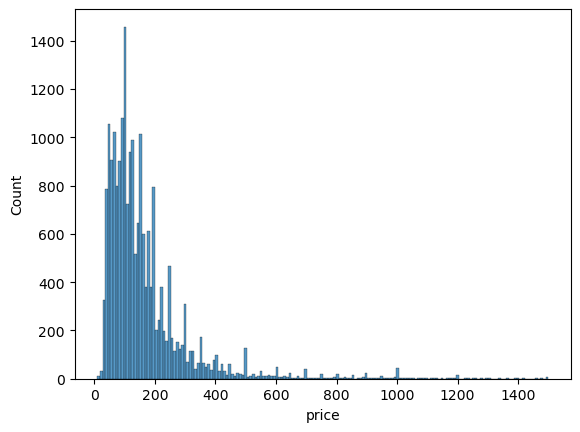

In [21]:
sb.histplot(data=df, x='price')
plt.show()

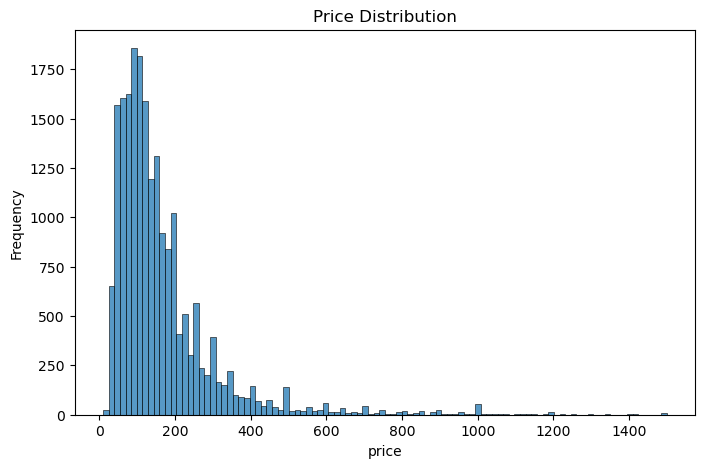

In [11]:
plt.figure(figsize = (8, 5))
sb.histplot(data=df, x='price', bins=100)
plt.title('Price Distribution')
plt.ylabel("Frequency")
plt.show()

**From the above graph we can analyze the prize distribution which is mainly ranging from 10 to 400 dollars.** **After $400 the prices are plummeting.**

**Now that we have gone through the 'Price' column, we can choose any column and analyze the trend/behaviour of it. Mostly for statistical analysis we 
need to choose the columns having numerical data type.**

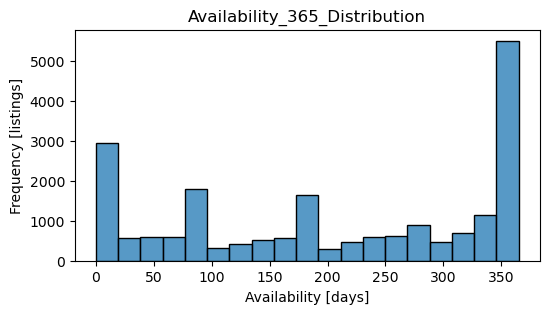

In [70]:
plt.figure(figsize = (6, 3))
sb.histplot(data=df, x='availability_365')
plt.title('Availability_365_Distribution')
plt.xlabel("Availability [days]")
plt.ylabel("Frequency [listings]")
plt.show()

Conclusions from the above chart:
1. Spike at 0 - Many listings are inactive or blocked year-round
2. Dip in the middle - Especially between 50 to 300 days, fewer listings with partial availability, Could be seasonal rentals, or listings blocked for certain parts of the year
3. Spike at 365 - Many listings are available all year, could be commercial properties.

**Now we will find the average price for each neighbourhood_group.**

In [7]:
df.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.076470
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

**Now we can find price per bed**

In [11]:
#price per bed

df['price per bed'] = df['price'] / df['beds']
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17680\652312796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price per bed'] = df['price'] / df['beds']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


**Through this we can now find the price per bed for each neighbourhood_group**

In [13]:
df.groupby(by='neighbourhood_group')['price per bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.662489
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

# Bi variate Analysis - It is the statistical analysis of two variables to understand the relationship between them.

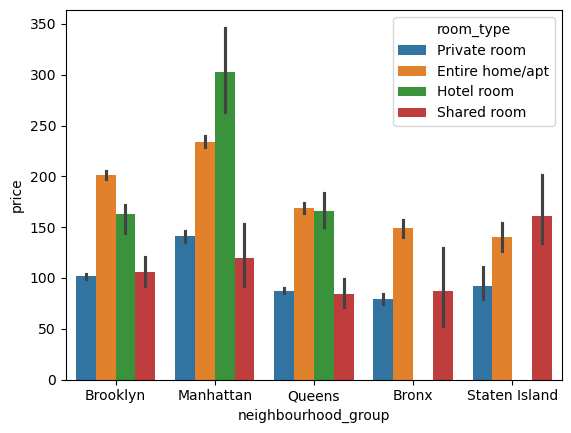

In [19]:
#price dependency on neighbourhood

sb.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.show()

Conclusions from the above chart:
Manhattan has the costliest hotel rooms(300+ dollars) and entire apartments/home(200-250 dollars) whereas Bronx has the cheapest private rooms(50-100 dollars) and shared rooms.

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

**Now we shall see if there is any relationship between the number_of_reviews and price.**

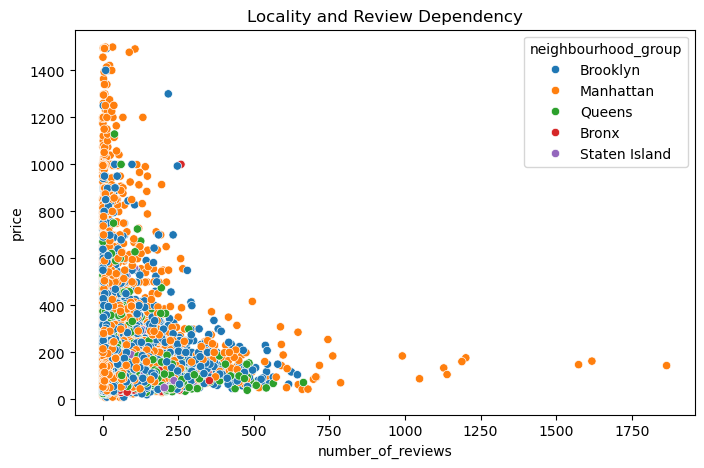

In [19]:
#no. of reviews and price relationship
plt.figure(figsize=(8, 5))
plt.title('Locality and Review Dependency')
sb.scatterplot(data = df, x='number_of_reviews', y='price', hue='neighbourhood_group')
plt.show()

**From this we can infer that as the prices are going up, the stays are getting less no. of reviews. As we can see that maximum no. of reviews are given for airbnb stays located in Manhattan and Brooklyn. It seems Staten Island and Bronx have less no. of reviews.**

**We can also get the no. of reviews as per the localities through the below approach.**

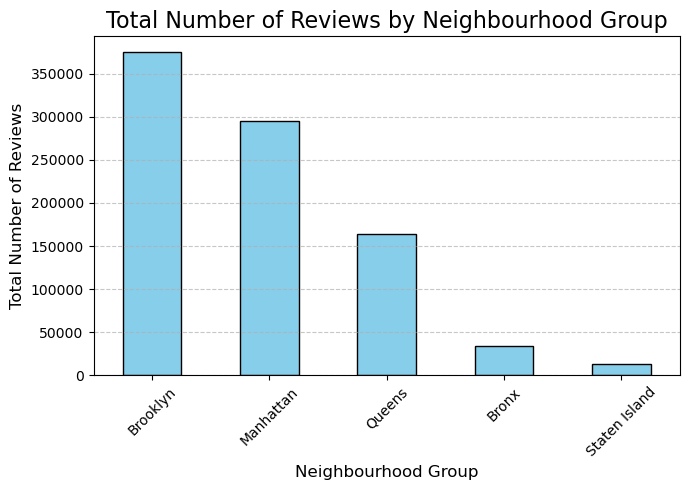

In [59]:
#no_of_reviews vs neighbourhood_group
review_counts = df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(7,5))
review_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Total Number of Reviews by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

**Now we will try to find the availability of different types of stays in each neighbourhood**

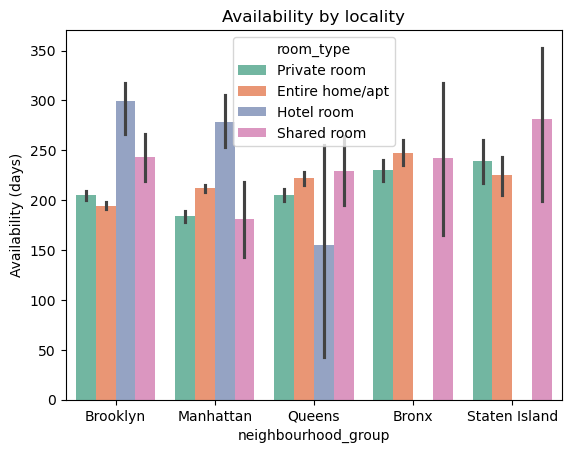

In [65]:
sb.barplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type', palette='Set2')
plt.title('Availability by locality')
plt.ylabel('Availability (days)')
plt.show()

Conclusions from above chart:
1. Brooklyn - Hotel rooms have the highest availability all year round
2. Manhattan - Hotel rooms are available most of the days compared to shared rooms and others.
3. Queens - There's a balanced availability for all types of stays.
4. Bronx - Mostly available across all types.
5. Staten Island - Shared rooms are highly available all year round.

**Now we will create a pairplot to understand different numerical columns at once**

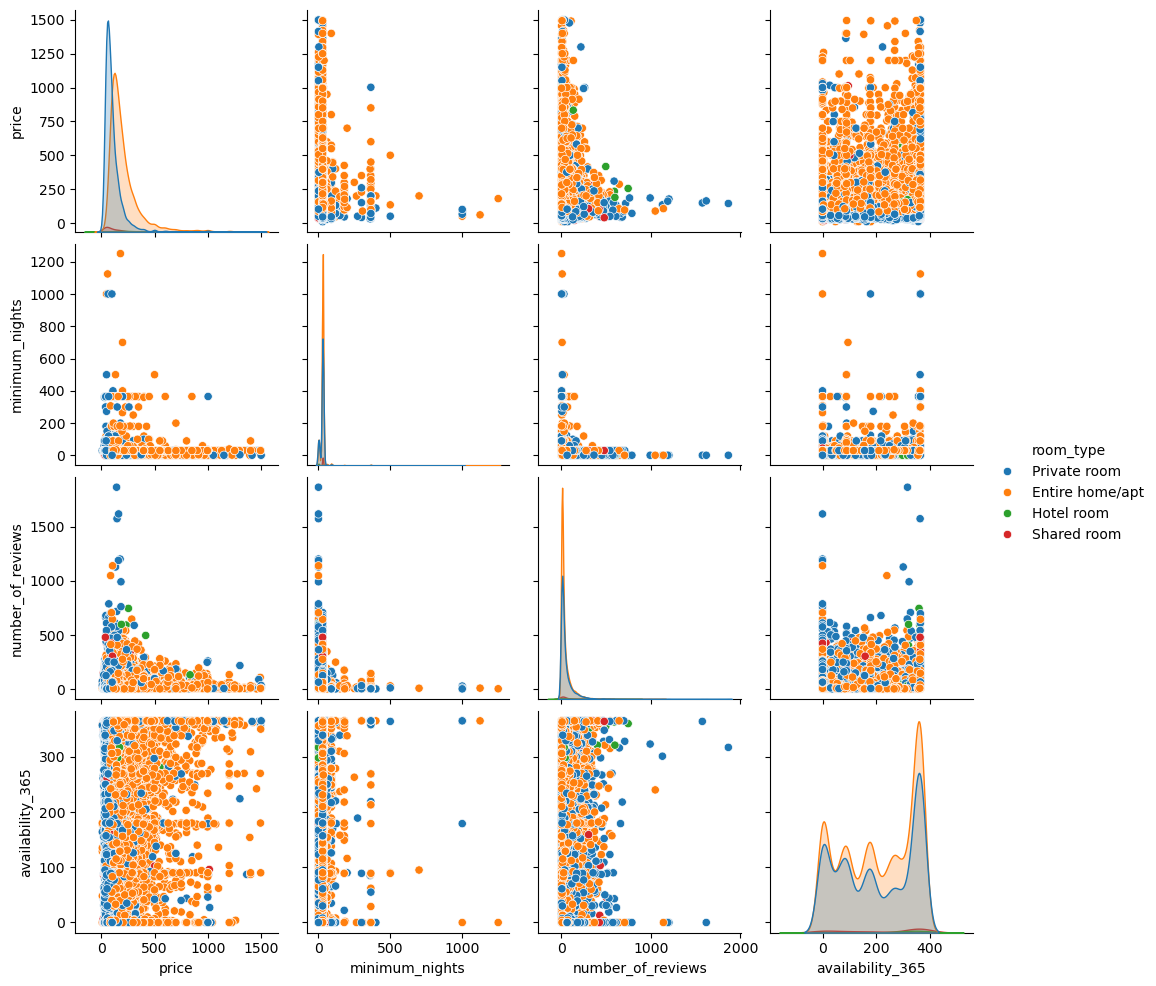

In [31]:
sb.pairplot(data = df, vars=['price','minimum_nights', 'number_of_reviews','availability_365'], hue='room_type')
plt.show()

Conclusions from above pairplot:
1. Mostly entire home/apt of all price ranges are booked for very less no. of mimimun nights.
2. Private rooms with lower prices have the highest no. of reviews.
3. Private rooms with lower prices have the most availability all year round.
4. Private rooms and entire home/apt with lesser no. of minimum nights have more no. of reviews compared to others.
5. Stays with lesser no. of minimum nights have more availability.
6. Mostly entire home/apt are avialble but get lesser no. of reviews.Whereas there are af ew private rooms available for almost the whole year which have highest no. of reviews.

**Now we can create a geospatial scatterplot to analyze it in a better way**

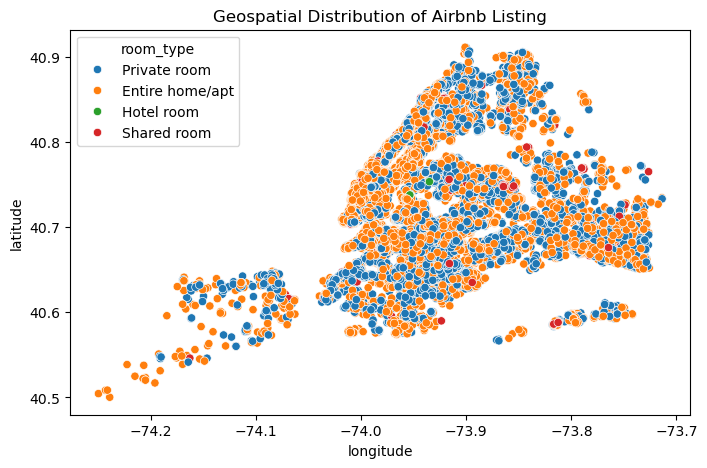

In [9]:
plt.figure(figsize=(8, 5))
plt.title('Geospatial Distribution of Airbnb Listing')
sb.scatterplot(data = df, x='longitude', y='latitude', hue='room_type')
plt.show()

**Mostly private rooms and entire home/apt are listed across NYC. It seems the hotel rooms are the least listed.** 

**Now we will craete a correlation heatmap using numerical columns.**

In [35]:
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
corr


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047242,0.012722,0.004586,-0.047836,-0.041733,-0.005648,-0.071798
longitude,0.047242,1.000000,-0.193625,0.023945,0.004958,0.041778,0.063239,0.041912
price,0.012722,-0.193625,1.000000,-0.044635,-0.043451,-0.012726,0.047961,0.415291
minimum_nights,0.004586,0.023945,-0.044635,1.000000,-0.059006,-0.122539,0.035389,-0.025874
number_of_reviews,-0.047836,0.004958,-0.043451,-0.059006,1.000000,0.630952,-0.049711,0.040071
reviews_per_month,-0.041733,0.041778,-0.012726,-0.122539,0.630952,1.000000,-0.040220,0.053575
availability_365,-0.005648,0.063239,0.047961,0.035389,-0.049711,-0.040220,1.000000,0.065860
beds,-0.071798,0.041912,0.415291,-0.025874,0.040071,0.053575,0.065860,1.000000


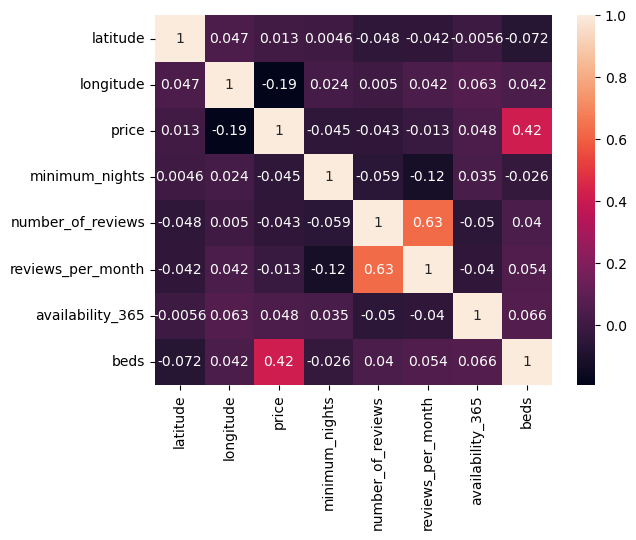

<Figure size 800x600 with 0 Axes>

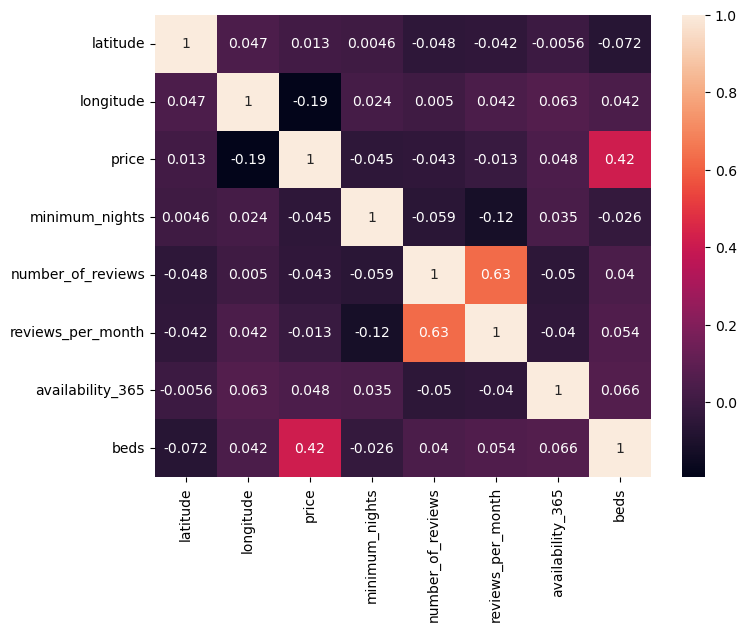

In [43]:
plt.figure(figsize = (8, 6))
sb.heatmap(data = corr, annot = True)
plt.show()

**A correlation always exists between the range of 1 and -1. If its 0 that means no correltion exists.**

**Positive correlation: Directly proportioanl
  Negative correlation: Inversely proportional
  0: No correlation
  +1: Perfect positive Correlation
  -1: Perfect Negative Correlation**

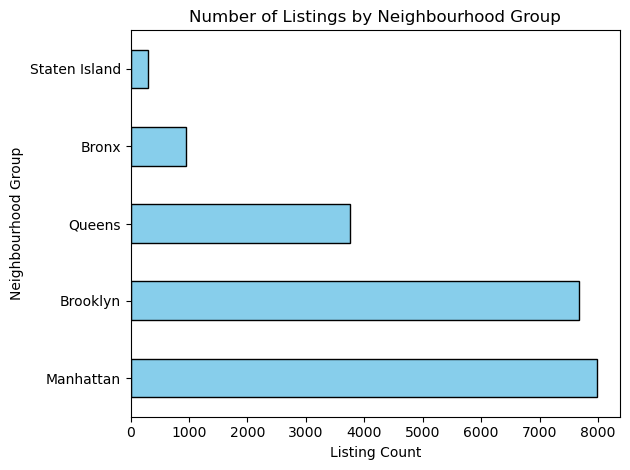

In [13]:
df['neighbourhood_group'].value_counts().plot(
    kind='barh',
    color='skyblue',
    edgecolor='black'
)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Listing Count')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.show()

**From the above horizontal barchart its clearly visible that Manhattan has the highest no. of listings and Staten Island has the least no. of listings.**